In [1]:
import numpy as np 
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score , KFold
from sklearn.linear_model import LassoCV,RidgeCV,Lasso,Ridge


In [2]:
boston = load_boston()
type(boston)


sklearn.utils.Bunch

In [3]:
X,y = boston['data'],boston['target']

In [4]:
y.shape



(506,)

In [5]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [7]:
X[:2]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00]])

In [8]:
lasso = Lasso(alpha=0.1)

In [9]:
lasso.fit(X,y)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [10]:
lasso.coef_

array([-0.09789363,  0.04921111, -0.03661906,  0.95519003, -0.        ,
        3.70320175, -0.01003698, -1.16053834,  0.27470721, -0.01457017,
       -0.77065434,  0.01024917, -0.56876914])

coefficent which least important will turn to zero

which is NOX 

In [11]:
lasso = Lasso(alpha = 10)

In [12]:
lasso.fit(X,y)

Lasso(alpha=10, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [13]:
lasso.coef_

array([-0.        ,  0.02614602, -0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.        , -0.00928242,
       -0.        ,  0.00749584, -0.56403807])

In [14]:
n_alphas = 200
alphas = np.linspace(0.1,10,n_alphas)# create array of 200 equally spaced elements
alphas.shape

(200,)

In [15]:
model = Lasso()
coef = []

for a in alphas:
    model.set_params(alpha=a)
    model.fit(X,y)
    coef.append(model.coef_)


In [16]:
len(coef)

200

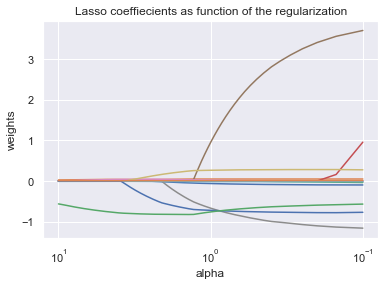

In [17]:
ax = plt.gca()
ax.plot(alphas,coef)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coeffiecients as function of the regularization')
plt.axis('tight')
plt.show()

In [18]:
lasso_cv = LassoCV(alphas = alphas,cv=3,random_state=17)
lasso_cv.fit(X,y)

LassoCV(alphas=array([ 0.1       ,  0.14974874,  0.19949749,  0.24924623,  0.29899497,
        0.34874372,  0.39849246,  0.44824121,  0.49798995,  0.54773869,
        0.59748744,  0.64723618,  0.69698492,  0.74673367,  0.79648241,
        0.84623116,  0.8959799 ,  0.94572864,  0.99547739,  1.04522613,
        1.09497487,  1.14472362,  1.19447236,  1.24422111,  1.29396985,
        1.34371859,  1.39346734,  1.44321608,  1.49296482,  1.54271357,
        1.5924...
        9.30351759,  9.35326633,  9.40301508,  9.45276382,  9.50251256,
        9.55226131,  9.60201005,  9.65175879,  9.70150754,  9.75125628,
        9.80100503,  9.85075377,  9.90050251,  9.95025126, 10.        ]),
        copy_X=True, cv=3, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=17, selection='cyclic', tol=0.0001,
        verbose=False)

In [19]:
lasso_cv.coef_

array([-0.09739888,  0.04946381, -0.02749478,  0.16060406, -0.        ,
        3.55971374, -0.00726968, -1.13393157,  0.28096773, -0.01503453,
       -0.77985441,  0.01025033, -0.58259584])

In [20]:
lasso_cv.alpha_

0.14974874371859298

In [21]:
cross_val_score(Lasso(lasso_cv.alpha_), X, y, cv=3, 
                scoring='neg_mean_squared_error')

array([-16.89312641, -37.56646167, -72.42092752])

In [22]:
abs(cross_val_score(Lasso(lasso_cv.alpha_),X,y,cv=3,scoring='neg_mean_squared_error').mean())

42.293505199150765

In [23]:
abs(cross_val_score(Lasso(9.95),X,y,cv=3,scoring='neg_mean_squared_error').mean())

53.72266087715847

In [26]:
lasso_cv.alphas[:10]

array([0.1       , 0.14974874, 0.19949749, 0.24924623, 0.29899497,
       0.34874372, 0.39849246, 0.44824121, 0.49798995, 0.54773869])

In [28]:
lasso_cv.alphas_[:10]

array([10.        ,  9.95025126,  9.90050251,  9.85075377,  9.80100503,
        9.75125628,  9.70150754,  9.65175879,  9.60201005,  9.55226131])

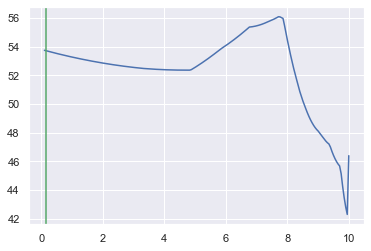

In [30]:
plt.plot(lasso_cv.alphas,lasso_cv.mse_path_.mean(1))
plt.axvline(lasso_cv.alpha_,c='g')

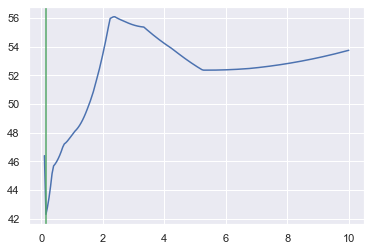

In [33]:
plt.plot(lasso_cv.alphas_,lasso_cv.mse_path_.mean(1))
plt.axvline(lasso_cv.alpha_,c='g')

In [37]:
lasso_cv.mse_path_.shape,lasso_cv.alphas.shape

((200, 3), (200,))

In [38]:
lasso_cv.alpha_


0.14974874371859298